<a href="https://colab.research.google.com/github/ByronFC3/2/blob/main/Used_Car_ML_Practice_11Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
uc = pd.read_csv('/content/UsedCars.csv')

In [ ]:
uc.head()

,Id,Model,Price,Age,KM,HP,Metallic,Automatic,CC,Doors,Gears,Weight
0,1,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,19700,192,0,0,1800,3,5,1185
1,2,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,31461,192,0,0,1800,3,6,1185
2,3,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...,19950,22,43610,192,0,0,1800,3,6,1185
3,4,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,32189,192,0,0,1800,3,6,1185
4,5,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,23000,192,1,0,1800,3,6,1185


In [ ]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1264 non-null   int64 
 1   Model      1264 non-null   object
 2   Price      1264 non-null   int64 
 3   Age        1264 non-null   int64 
 4   KM         1264 non-null   int64 
 5   HP         1264 non-null   int64 
 6   Metallic   1264 non-null   int64 
 7   Automatic  1264 non-null   int64 
 8   CC         1264 non-null   int64 
 9   Doors      1264 non-null   int64 
 10  Gears      1264 non-null   int64 
 11  Weight     1264 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 118.6+ KB


In [ ]:
uc.describe()

,Id,Price,Age,KM,HP,Metallic,Automatic,CC,Doors,Gears,Weight
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,632.500000,10679.310127,56.582278,62542.342563,104.204114,0.675633,0.062500,1527.533228,4.023734,5.030854,1061.579905
std,365.029679,3326.577912,18.306302,30173.800709,12.730141,0.468323,0.242157,426.987582,0.952260,0.190421,38.461587
min,1.000000,5250.000000,1.000000,1.000000,71.000000,0.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,316.750000,8500.000000,44.000000,40183.750000,97.000000,0.000000,0.000000,1400.000000,3.000000,5.000000,1035.000000
50%,632.500000,9940.000000,61.000000,60716.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,5.000000,1060.000000
75%,948.250000,11900.000000,70.250000,80474.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,5.000000,1075.000000
max,1264.000000,24500.000000,80.000000,194545.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import kagglehub
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [14]:
# Load the data and initial exploration
df = pd.read_csv('/content/UsedCars.csv')

# Initial exploration
print(f"Dataset shape: {df.shape}\n")
print("Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))
print("\nData types:")
print(df.dtypes)

# Check for duplicate records
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


# Display basic statistics
print("\nDescriptive Statistics:")
display(df.describe())

# Display the time range of the data
# print(f"\nTime range: {df.index.min()} to {df.index.max()}")
# print(f"Total duration: {(df.index.max() - df.index.min()).days/365:.1f} years")

# Display correlation matrix
print("\nCorrelation Matrix:")
display(df.drop('Model', axis=1).corr())

Dataset shape: (1264, 12)

Missing values per column:
Id           0
Model        0
Price        0
Age          0
KM           0
HP           0
Metallic     0
Automatic    0
CC           0
Doors        0
Gears        0
Weight       0
dtype: int64

Data types:
Id            int64
Model        object
Price         int64
Age           int64
KM            int64
HP            int64
Metallic      int64
Automatic     int64
CC            int64
Doors         int64
Gears         int64
Weight        int64
dtype: object

Number of duplicate rows: 0

Descriptive Statistics:


,Id,Price,Age,KM,HP,Metallic,Automatic,CC,Doors,Gears,Weight
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,632.500000,10679.310127,56.582278,62542.342563,104.204114,0.675633,0.062500,1527.533228,4.023734,5.030854,1061.579905
std,365.029679,3326.577912,18.306302,30173.800709,12.730141,0.468323,0.242157,426.987582,0.952260,0.190421,38.461587
min,1.000000,5250.000000,1.000000,1.000000,71.000000,0.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,316.750000,8500.000000,44.000000,40183.750000,97.000000,0.000000,0.000000,1400.000000,3.000000,5.000000,1035.000000
50%,632.500000,9940.000000,61.000000,60716.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,5.000000,1060.000000
75%,948.250000,11900.000000,70.250000,80474.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,5.000000,1075.000000
max,1264.000000,24500.000000,80.000000,194545.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000



Correlation Matrix:


,Id,Price,Age,KM,HP,Metallic,Automatic,CC,Doors,Gears,Weight
Id,1.000000,-0.773776,0.902595,0.362546,-0.201934,-0.077263,0.056058,-0.076010,-0.133446,-0.054157,-0.390747
Price,-0.773776,1.000000,-0.894556,-0.618387,0.341176,0.089420,0.045561,0.131026,0.194095,0.075798,0.604644
Age,0.902595,-0.894556,1.000000,0.601164,-0.189916,-0.097826,0.025362,-0.077692,-0.155401,-0.012653,-0.468098
KM,0.362546,-0.618387,0.601164,1.000000,-0.080712,-0.050966,-0.055480,-0.043892,-0.061859,0.035765,-0.270487
HP,-0.201934,0.341176,-0.189916,-0.080712,1.000000,0.048698,-0.040356,0.274015,0.123109,0.245634,0.517446
Metallic,-0.077263,0.089420,-0.097826,-0.050966,0.048698,1.000000,-0.023563,0.039886,0.081191,0.023531,0.062716
Automatic,0.056058,0.045561,0.025362,-0.055480,-0.040356,-0.023563,1.000000,0.101070,-0.027039,-0.076194,0.153885
CC,-0.076010,0.131026,-0.077692,-0.043892,0.274015,0.039886,0.101070,1.000000,0.081851,0.035312,0.221783
Doors,-0.133446,0.194095,-0.155401,-0.061859,0.123109,0.081191,-0.027039,0.081851,1.000000,-0.174332,0.382996
Gears,-0.054157,0.075798,-0.012653,0.035765,0.245634,0.023531,-0.076194,0.035312,-0.174332,1.000000,0.087392


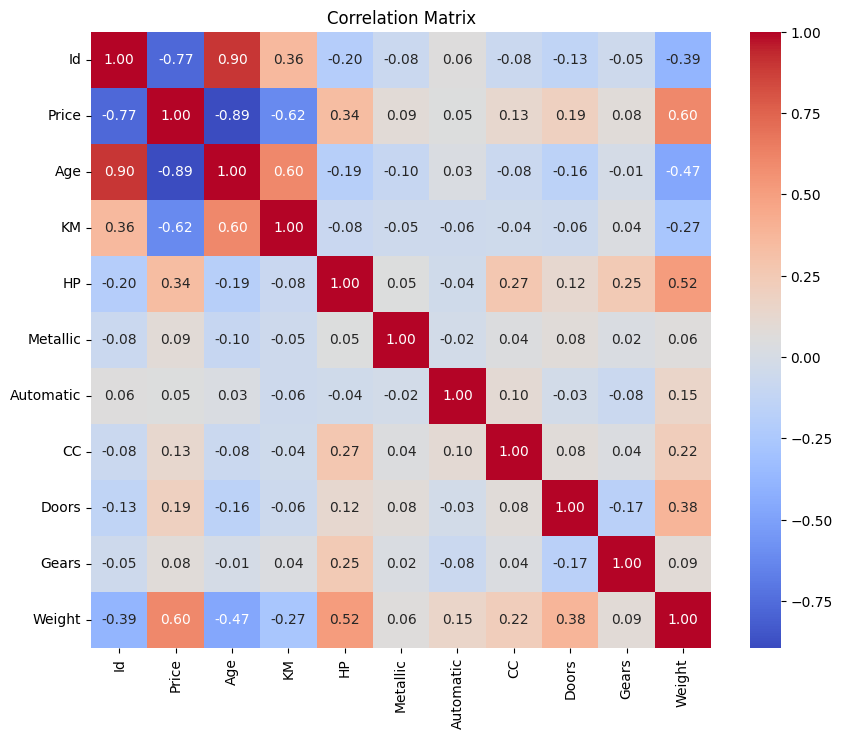

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix excluding the 'Model' column
correlation_matrix = df.drop('Model', axis=1).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Removing varibles that hold no significate value

In [16]:
columns_to_drop = ['CC', 'Doors', 'Gears', 'Automatic', 'Metallic', 'HP']
df = df.drop(columns=columns_to_drop)
display(df.head())

,Id,Model,Price,Age,KM,Weight
0,1,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,19700,1185
1,2,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,31461,1185
2,3,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...,19950,22,43610,1185
3,4,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,32189,1185
4,5,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,23000,1185


In [18]:
df.shape

(1264, 6)

In [22]:
corr = df.drop('Model', axis=1).corr()
display(corr)

,Id,Price,Age,KM,Weight
Id,1.000000,-0.773776,0.902595,0.362546,-0.390747
Price,-0.773776,1.000000,-0.894556,-0.618387,0.604644
Age,0.902595,-0.894556,1.000000,0.601164,-0.468098
KM,0.362546,-0.618387,0.601164,1.000000,-0.270487
Weight,-0.390747,0.604644,-0.468098,-0.270487,1.000000


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(uc.drop('Model', axis=1))

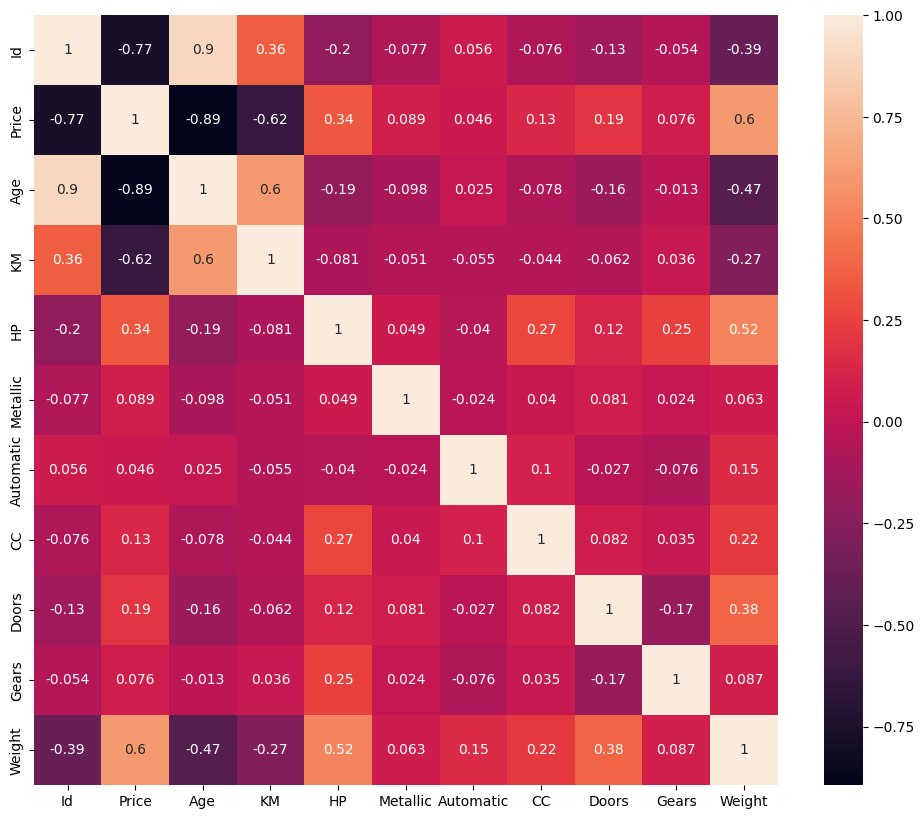

In [26]:
import matplotlib.pyplot as plt
corr = uc.drop('Model', axis=1).corr()
plt.figure(figsize=(12, 10)) # Increase the figure size
sns.heatmap(corr,annot=True)
plt.show()

Scalling the Data

In [29]:
X = uc.drop('Id',axis=1)
y = uc['Id']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1011, 11), (253, 11), (1011,), (253,))

Build Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_features = ['Model']
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

# Create a column transformer to apply one-hot encoding to the categorical column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Create a pipeline with the preprocessor and the Linear Regression model
regressor = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])

# Train the model
regressor.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Price', 'Age', 'KM', 'HP',
                                                   'Metallic', 'Automatic',
                                                   'CC', 'Doors', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Model'])])),
                ('regressor', LinearRegression())])

In [34]:
LinearRegression()

LinearRegression()

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
calculation = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(calculation)

,Actual,Predicted
1208,1209,1118.143489
868,869,930.113069
532,533,607.175440
344,345,347.836537
405,406,525.033849
...,...,...
163,164,167.245456
485,486,406.592579
679,680,774.118438
221,222,245.560160


In [37]:
print("Training Accuracy :", regressor.score(X_train,y_train))
print("Testing Accuracy :", regressor.score(X_test,y_test))

Training Accuracy : 0.8921470876806424
Testing Accuracy : 0.8876245451595651


In [39]:
print(regressor.named_steps['regressor'].intercept_)

-220.36374252033306


In [40]:
regressor.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

Test the Model

In [42]:
# Apply the same preprocessing as in the training pipeline
X_train_processed = regressor.named_steps['preprocessor'].transform(X_train)
X_test_processed = regressor.named_steps['preprocessor'].transform(X_test)

ChatGPT

In [43]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=["Price", "Model", "Id"])  # Drop target and non-numeric/text columns
y = df["Price"]

# Train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Choose and Train a Model
Example with Linear Regression (you could use Random Forest, XGBoost, etc.):


In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

3. Make Predictions on Test Set

In [45]:
y_pred = model.predict(X_test)


4. Evaluate the Model
For regression, common metrics are R², MAE, and RMSE:

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 908.25
RMSE: 1162.28
R²: 0.86


5. (Optional) Cross-Validation for More Robust Testing

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())


Cross-validated R² scores: [ 0.36842526  0.09408241  0.23589958  0.3501759  -0.4044922 ]
Mean R²: 0.12881818733876757


 Interpretation:

The train/test split shows the model explains about 85% of the variance on the held-out test set — good for a first pass.

However, the cross-validation results are unstable and in some folds negative (meaning the model performed worse than just predicting the average price). This suggests:

Possible overfitting to certain splits

Nonlinear patterns that Linear Regression isn’t capturing well

Feature scaling or transformation might help

Trying more flexible models (Random Forest, Gradient Boosting, etc.) could improve generalization

New: Use Random Forest

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("UsedCars.csv")

# Features and target
X = df.drop(columns=["Price", "Model", "Id"])  # Drop non-numeric/text columns
y = df["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # let trees expand until pure
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Print results
print("📊 Test Set Performance")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print("\n📊 Cross-Validation (5-Fold)")
print("Fold Scores:", cv_scores)
print("Mean R²:", cv_scores.mean())


📊 Test Set Performance
MAE: 855.70
RMSE: 1097.42
R²: 0.88

📊 Cross-Validation (5-Fold)
Fold Scores: [-3.54618892e-01  2.57167044e-01  4.71352678e-04  5.62970852e-01
 -1.38084395e-01]
Mean R²: 0.06558119229834743


📊 Test Set Performance

  MAE: 855.70 (↓ better than Linear Regression’s 962.94)

  RMSE: 1,097.42 (↓ better than Linear Regression’s 1,208.11)

  R²: 0.879 (↑ better than Linear Regression’s 0.854)


📊 Cross-Validation (5-Fold)

  Mean R²: 0.066 (↑ better than Linear Regression’s -0.55, but still unstable)

  Fold Scores: [-0.355, 0.257, 0.00047, 0.563, -0.138]


🔍 Interpretation:

Random Forest improved test set accuracy compared to Linear Regression.

Cross-validation still shows inconsistent generalization, suggesting the dataset might be small or highly variant in some splits.

To stabilize results, you could:

  Use more robust cross-validation (e.g., shuffle-split or repeated k-fold).

  Add feature engineering (e.g., interactions, scaling, encoding categories).

  Tune hyperparameters (n_estimators, max_depth, min_samples_split, etc.) with Grid Search or Random Search.

# Adjustment Recommended by LLM

In [49]:
# Lightweight Random Forest tuning + evaluation for UsedCars.csv

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1) Load data ---
# Update this path if needed
df = pd.read_csv("UsedCars.csv")

# --- 2) Feature/target split ---
X = df.drop(columns=["Price", "Model", "Id"], errors="ignore")  # drop non-features/ID/text
y = df["Price"]

# --- 3) Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 4) Define a small, sensible search space ---
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
}

# --- 5) Randomized search (fast) with 3-fold CV ---
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=10,            # keep it light
    cv=3,                 # lighter than 5-fold for small data
    scoring="r2",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

print("Best Params:", search.best_params_)
print("Best CV R²:", round(search.best_score_, 4))

# --- 6) Fit the best model on the full training set ---
best_rf = search.best_estimator_
best_rf.fit(X_train, y_train)

# --- 7) Evaluate on the test set ---
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
r2 = r2_score(y_test, y_pred)

print("\n📊 Test Set Performance")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

# --- 8) (Optional) Show top feature importances ---
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Feature Importances:")
print(importances.head(10))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best CV R²: 0.9078

📊 Test Set Performance
MAE:  813.04
RMSE: 1018.89
R²:   0.896

Top Feature Importances:
Age          0.525398
Weight       0.203145
KM           0.192947
HP           0.033769
CC           0.028248
Doors        0.006849
Metallic     0.004571
Automatic    0.002707
Gears        0.002367
dtype: float64


# Now I will drop the bottom four features becuase they only contribute to 1.6% of the models predictive power. the top five contribue to 92% of the models predictive power.

In [50]:
# Compare Random Forest with all features vs. dropping bottom 4
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------- 1) Load data ----------
df = pd.read_csv("UsedCars.csv")

# ---------- 2) Define helpers ----------
def eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
    r2   = r2_score(y_test, y_pred)
    return mae, rmse, r2

def print_results(title, mae, rmse, r2):
    print(f"\n{title}")
    print("-" * len(title))
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.3f}")

# ---------- 3) Columns ----------
target = "Price"
drop_text_cols = ["Model", "Id"]  # non-feature/text columns
low_importance_cols = ["Doors", "Metallic", "Automatic", "Gears"]  # drop candidates

# ---------- 4) Train/test split (fixed seed for fair comparison) ----------
# (A) All features
X_all = df.drop(columns=[target] + drop_text_cols, errors="ignore")
y = df[target]

X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

# (B) Reduced features (drop bottom 4)
X_reduced = X_all.drop(columns=low_importance_cols, errors="ignore")
# Use the SAME split indices for a fair A/B test
# Recreate with same random split by concatenating indices:
train_idx = X_train_all.index
test_idx  = X_test_all.index
X_train_reduced = X_reduced.loc[train_idx]
X_test_reduced  = X_reduced.loc[test_idx]

# ---------- 5) Models (light but strong defaults) ----------
rf_params = dict(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_all = RandomForestRegressor(**rf_params)
rf_reduced = RandomForestRegressor(**rf_params)

# ---------- 6) Evaluate ----------
mae_all, rmse_all, r2_all = eval_model(rf_all, X_train_all, X_test_all, y_train, y_test)
mae_red, rmse_red, r2_red = eval_model(rf_reduced, X_train_reduced, X_test_reduced, y_train, y_test)

# ---------- 7) Report ----------
print_results("All Features", mae_all, rmse_all, r2_all)
print_results("Reduced Features (Dropped: Doors, Metallic, Automatic, Gears)", mae_red, rmse_red, r2_red)

# ---------- 8) Optional: show top importances for reduced model ----------
importances = pd.Series(rf_reduced.feature_importances_, index=X_reduced.columns).sort_values(ascending=False)
print("\nTop Feature Importances (Reduced Model):")
print(importances.head(10))



All Features
------------
MAE : 835.06
RMSE: 1047.70
R²  : 0.890

Reduced Features (Dropped: Doors, Metallic, Automatic, Gears)
-------------------------------------------------------------
MAE : 844.07
RMSE: 1056.20
R²  : 0.888

Top Feature Importances (Reduced Model):
Age       0.536265
Weight    0.242794
KM        0.172605
HP        0.024606
CC        0.023730
dtype: float64
